In [1]:
import numpy as np
import json
import pandas as pd
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('entity2id.txt', sep = '\t', header=None)
data.columns = ['Identity','ID']

In [3]:
drugID = data[data.Identity.str.startswith('DB')]

In [4]:
ID = drugID.ID
ID = np.asarray(ID)
ID

array([    0,     2,    10, ..., 58197, 58198, 58214])

In [5]:
input_file = open ('embedding.vec.json')
json_array = json.load(input_file)

In [7]:
ent_embeddings = json_array['ent_embeddings']

In [13]:
myarray = np.asarray(ent_embeddings)

In [15]:
myarrayDrug = myarray[ID ,  :]

In [17]:
myarrayDrug.shape

(9521, 500)

In [29]:
X_embedded = TSNE(n_components=2, verbose=1, perplexity=40).fit_transform(myarrayDrug)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9521 samples in 0.286s...
[t-SNE] Computed neighbors for 9521 samples in 84.674s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9521
[t-SNE] Computed conditional probabilities for sample 2000 / 9521
[t-SNE] Computed conditional probabilities for sample 3000 / 9521
[t-SNE] Computed conditional probabilities for sample 4000 / 9521
[t-SNE] Computed conditional probabilities for sample 5000 / 9521
[t-SNE] Computed conditional probabilities for sample 6000 / 9521
[t-SNE] Computed conditional probabilities for sample 7000 / 9521
[t-SNE] Computed conditional probabilities for sample 8000 / 9521
[t-SNE] Computed conditional probabilities for sample 9000 / 9521
[t-SNE] Computed conditional probabilities for sample 9521 / 9521
[t-SNE] Mean sigma: 0.022420
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.137779
[t-SNE] KL divergence after 1000 iterations: 4.754683


In [20]:
X_embedded

array([[-2.0825777 ,  1.910756  ],
       [ 7.2584167 , -1.0498276 ],
       [-2.0916932 , 13.287224  ],
       ...,
       [-0.3577199 ,  2.5845299 ],
       [ 2.2571294 , -5.3642406 ],
       [-0.19836561,  2.0689874 ]], dtype=float32)

In [31]:
!pip install umap-learn

     |████████████████████████████████| 40kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 2.0MB 6.2MB/s eta 0:00:01
     |████████████████████████████████| 15.9MB 23.7MB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.3.10-cp37-none-any.whl size=38881 sha256=a777352f40026b0ea586debcade3612fd36f950bb1d5b9f864837747188fc680
  Stored in directory: /Users/syuan4/Library/Caches/pip/wheels/d0/f8/d5/8e3af3ee957feb9b403a060ebe72f7561887fef9dea658326e
Successfully built umap-learn
You should consider upgrading via the 'pip install --upgrade pip' command.


In [39]:
myarrayDrug.shape

(9521, 500)

In [43]:
X_embedded.shape

(500, 2)

In [46]:
X_embedded = umap.UMAP(n_neighbors = 3).fit_transform(myarrayDrug)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


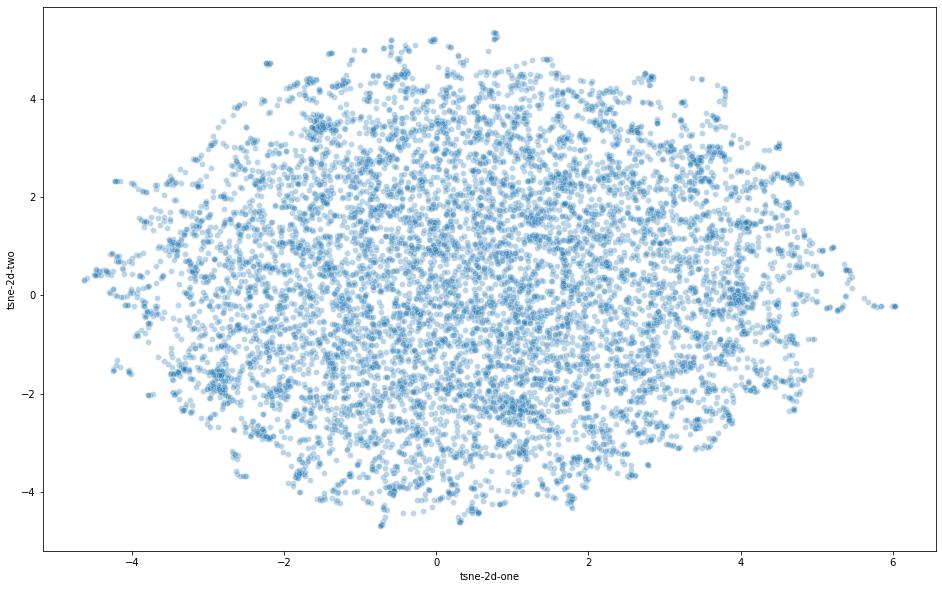

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.DataFrame({'tsne-2d-one': X_embedded[:, 0], 'tsne-2d-two': X_embedded[:, 1]})
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=dataset,
    legend="full",
    alpha=0.3
)

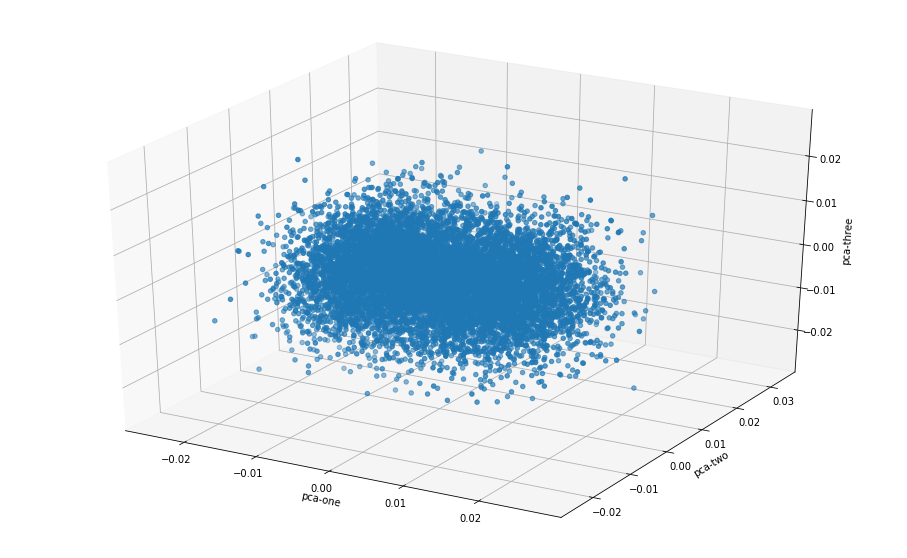

In [52]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(myarrayDrug)
df = pd.DataFrame({'pca-one': pca_result[:, 0], 'pca-two': pca_result[:, 1],'pca-three': pca_result[:, 2]})

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    #c=df["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [53]:
pca.explained_variance_ratio_

array([0.00496025, 0.00286099, 0.00284415])

In [56]:
np.min(myarrayDrug)

-0.017944609746336937